## 판매 분석

In [1]:
!pip install pymysql > /dev/null
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [1]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving mysql.json to mysql.json


In [2]:
import json
with open(filename) as fp:
    config_str = fp.read()
config = json.loads(config_str)

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [4]:
import db_module as dm

In [19]:
# !ls -la

total 44
drwxr-xr-x 1 root root 4096 Aug 26 08:38 .
drwxr-xr-x 1 root root 4096 Aug 26 08:30 ..
drwxr-xr-x 4 root root 4096 Aug 13 13:34 .config
-rw-r--r-- 1 root root 2212 Aug 26 08:38 db_module.py
drwxr-xr-x 2 root root 4096 Aug 26 08:38 .ipynb_checkpoints
-rw-r--r-- 1 root root  120 Aug 26 08:31 mysql.json
drwxr-xr-x 2 root root 4096 Aug 26 08:32 __pycache__
-rw-r--r-- 1 root root 9643 Aug 26 08:37 sales_book.csv
drwxr-xr-x 1 root root 4096 Aug 13 13:35 sample_data


## 1.월별 매출/이익

In [5]:
results = dm.get_monthly_data(config)
#results = get_monthly(config)
df = pd.DataFrame(results, columns=['월','매출','이익'])
df.set_index('월', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

,매출,이익
월,,
01,6296800,345910
02,5879400,621820
03,6017700,474600
04,7464600,662650
05,4621400,460590
06,3984200,223980
07,7164000,670760
08,3122600,330590
09,3686600,199700


In [6]:
tdf = df.T
tdf['계'] = [df.매출.sum(), df.이익.sum()]
tdf

월,01,02,03,04,05,06,07,08,09,10,11,12,계
매출,6296800,5879400,6017700,7464600,4621400,3984200,7164000,3122600,3686600,6711500,7499400,5236600,67684800
이익,345910,621820,474600,662650,460590,223980,670760,330590,199700,718290,420480,391730,5521100


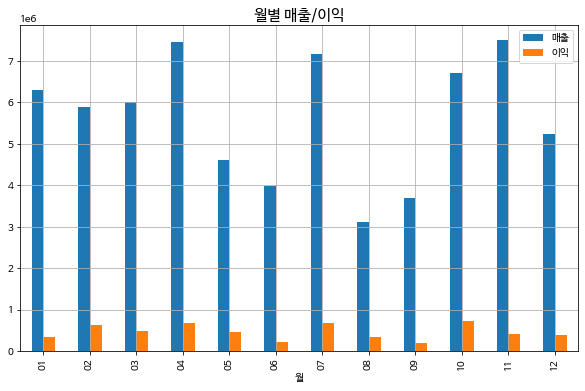

In [7]:
df.plot.bar(figsize=(10,6))
plt.title('월별 매출/이익', size=15)
plt.grid()
plt.show()

## 2. 거래처별 매출/이익

In [8]:
# 소수점 자리수 제한을 위한 코드
pd.options.display.float_format = '{:.2}'.format

In [9]:
results = dm.get_data_by_company(config)
df = pd.DataFrame(results, columns=['판매처','매출','이익'])
df.set_index('판매처', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df['이익율'] = df.이익 / df.매출 * 100
df

,매출,이익,이익율
판매처,,,
테크브루,19155800,1488130,7.8
한경아카데미,15299300,1477570,9.7
표준협회,13932700,1072730,7.7
생산성본부,10286300,822900,8.0
멀티캠퍼스,9010700,659770,7.3


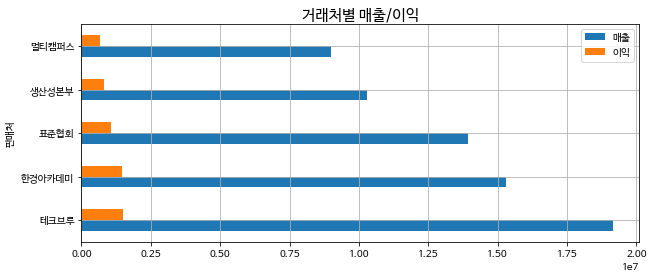

In [10]:
df[['매출','이익']].plot.barh(rot=0, figsize=(10,4))
plt.title('거래처별 매출/이익', size=15)
plt.grid()
plt.show()

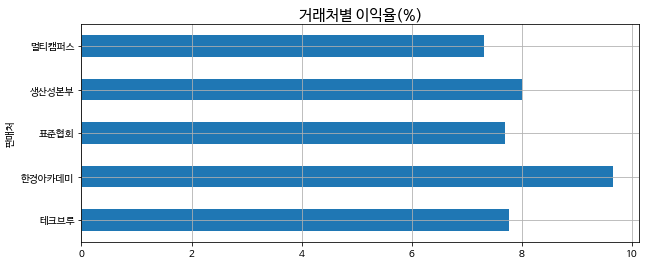

In [11]:
df['이익율'].plot.barh(rot=0, figsize=(10,4))
plt.title('거래처별 이익율(%)', size=15)
plt.grid()
plt.show()

## 3. 거래처별 판매상품 및 수량

In [12]:
results = dm.get_products_by_company(config)
df = pd.DataFrame(results, columns=['판매처','상품','수량'])
df.set_index(['판매처','상품'], inplace=True)
df['수량'] = df.수량.astype(int)
df

수량
판매처    상품       
멀티캠퍼스  거꾸리    28
       러닝머신   20
       로잉머신   20
       매트     24
       보조배터리   5
...           ..
한경아카데미 타프     26
       텐트     35
       트램펄린   14
       핸즈프리   18
       후방카메라  17

[85 rows x 1 columns]

In [13]:
df.reset_index()['판매처'].unique()

array(['멀티캠퍼스', '생산성본부', '테크브루', '표준협회', '한경아카데미'], dtype=object)

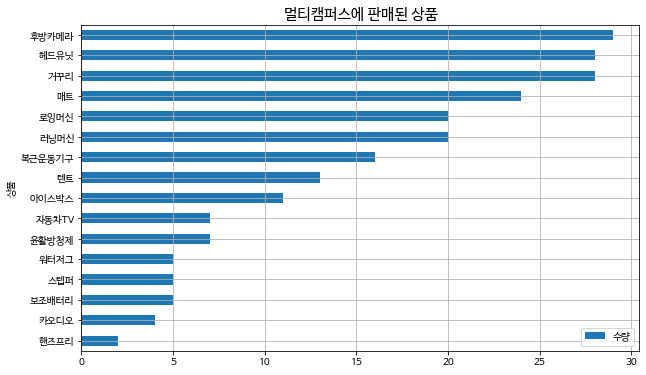

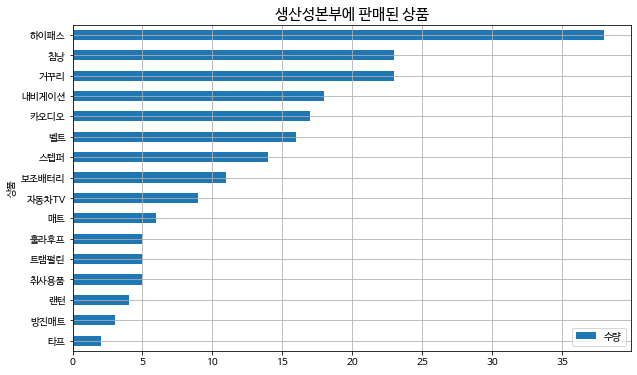

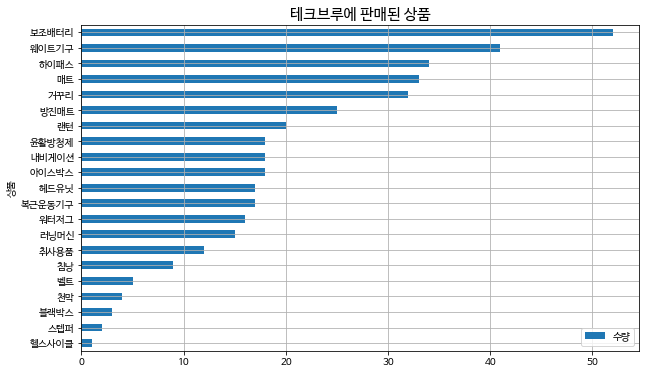

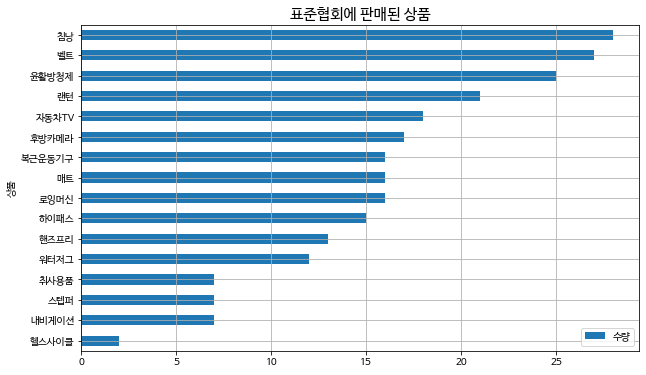

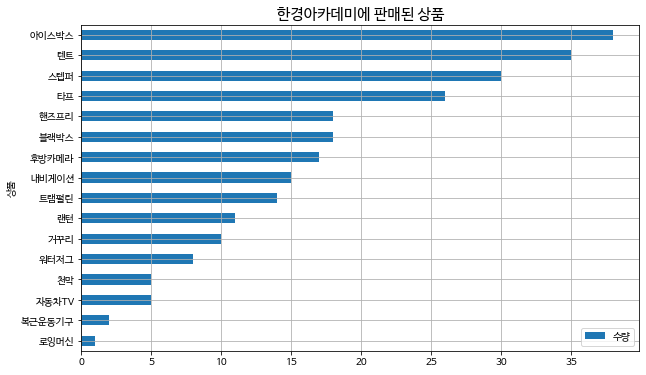

In [14]:
for company in df.reset_index()['판매처'].unique():
    sdf=df.loc[(company,)]
    sdf.sort_values(by='수량').plot.barh(figsize=(10,6))
    plt.title(f'{company}에 판매된 상품', size=15)
    plt.grid()
    plt.show()

## 4. 제품별 판매수량/매출/이익

In [15]:
results = dm.get_data_by_products(config)
df = pd.DataFrame(results, columns=['상품','수량','매출','이익'])
df.set_index('상품', inplace=True)
df['수량'] = df.수량.astype(int)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

,수량,매출,이익
상품,,,
텐트,48,4555200,683520
타프,28,2410800,337400
천막,9,710100,28440
침낭,60,3960000,435600
매트,79,1200800,83740
랜턴,56,5297600,264880
취사용품,24,1387200,194160
아이스박스,67,2036800,121940
보조배터리,68,5100000,408000


In [16]:
results = dm.get_data_by_products(config)
df = pd.DataFrame(results, columns=['상품','수량','매출','이익'])
df.set_index('상품', inplace=True)
df['수량'] = df.수량.astype(int)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

,수량,매출,이익
상품,,,
텐트,48,4555200,683520
타프,28,2410800,337400
천막,9,710100,28440
침낭,60,3960000,435600
매트,79,1200800,83740
랜턴,56,5297600,264880
취사용품,24,1387200,194160
아이스박스,67,2036800,121940
보조배터리,68,5100000,408000


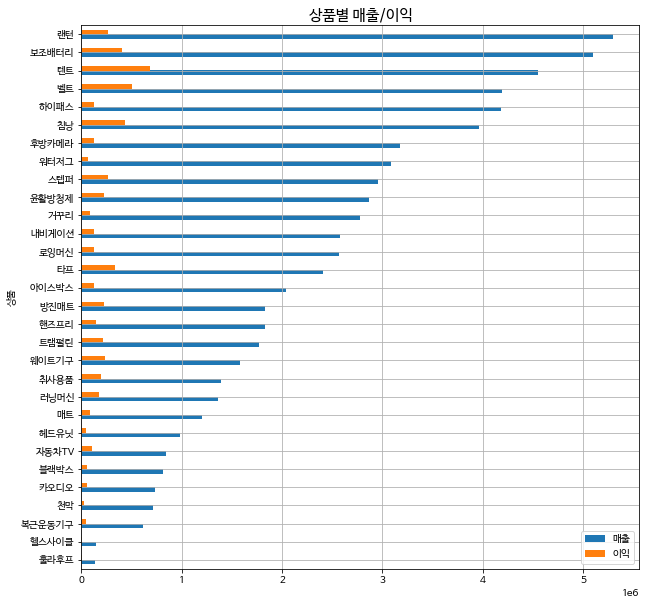

In [17]:
df[['매출','이익']].sort_values(by='매출').plot.barh(rot=0, figsize=(10,10))
plt.title('상품별 매출/이익', size=15)
plt.grid()
plt.show()

## 5. 카테고리별 매출/이익

In [18]:
results = dm.get_data_by_category(config)
df = pd.DataFrame(results, columns=['카테고리','매출','이익'])
df.set_index('카테고리', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df['이익율'] = df.이익 / df.매출 * 100
df

,매출,이익,이익율
카테고리,,,
캠핑용품,29745800,2619590,8.8
자동차용품,19830700,1241490,6.3
헬스용품,18108300,1660020,9.2


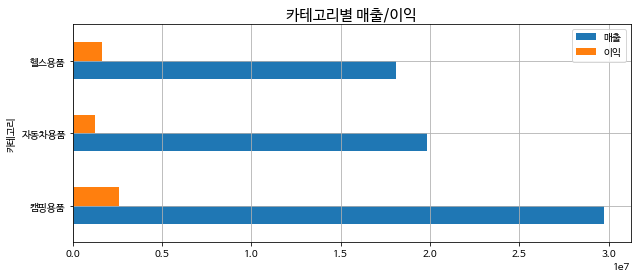

In [19]:
df[['매출','이익']].plot.barh(rot=0, figsize=(10,4))
plt.title('카테고리별 매출/이익', size=15)
plt.grid()
plt.show()

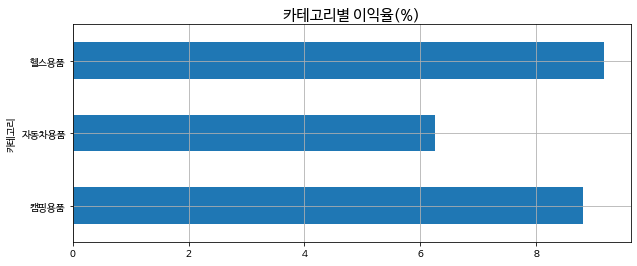

In [20]:
df['이익율'].plot.barh(rot=0, figsize=(10,4))
plt.title('카테고리별 이익율(%)', size=15)
plt.grid()
plt.show()